## Week 6: Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**(1a) Load the data file 'data1.csv' and visualize the data.**

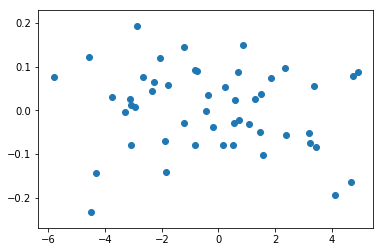

In [2]:
df = pd.read_csv('data1.csv', header = None);
X = df[0];
Y = df[1];
plt.scatter(X, Y)
plt.show()

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [3]:
loss_1 = np.linalg.norm(X)**2
loss_2 = np.linalg.norm(Y)**2

if(loss_1 < loss_2):
    print("Single Feature: X2");
else:
    print("Single Feature: X1"); 

Single Feature: X1


**(1c) Visualize the approximated data and compare it with the original data.**

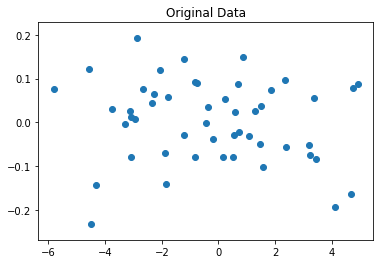

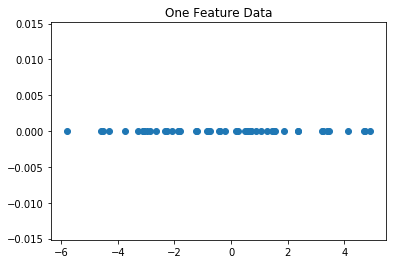

In [4]:
plt.scatter(X, Y)
plt.title('Original Data')
plt.show()

if(loss_1 < loss_2):
    plt.scatter(np.zeros(len(X)), Y)
else:
    plt.scatter(X, np.zeros(len(Y)))
plt.title('One Feature Data')
plt.show()

### Observations:
- Approximated Data being one dimensional will be easy and fast to handle.
- We see that loss incured by removing X2 is less than loss incured by removing X1 and Hence, we approximated data by removing X2.

**(2a) Load the data file 'data2.csv'.**

In [5]:
df = pd.read_csv('data2.csv', header = None);
X1 = df[0];
X2 = df[1];
X3 = df[2];
X4 = df[3];

**(2c) Plot the minimum representation loss as a function of the number of features used for representation.**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

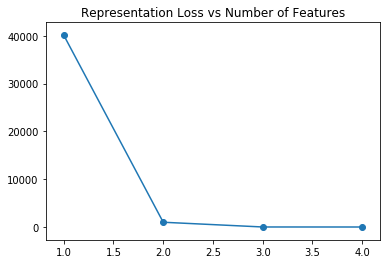

Order of Significance: X3 > X2 > X1 > X4


In [6]:
no_features = [1, 2, 3, 4];
loss1 = np.linalg.norm(X1)**2;
loss2 = np.linalg.norm(X2)**2;
loss3 = np.linalg.norm(X3)**2;
loss4 = np.linalg.norm(X4)**2;
loss_no_feature = [loss1+loss2+loss4, loss1+loss4, loss4, 0];

plt.plot(no_features, loss_no_feature)
plt.scatter(no_features, loss_no_feature)
plt.title('Representation Loss vs Number of Features')
plt.show()

print("Order of Significance: X3 > X2 > X1 > X4")

**(2d) Compute the covariance matrix of the $m$ features. Comment with respect to (2c).**

In [7]:
print("Covariance Matrix: ");
print(np.cov(np.matrix([X1, X2, X3, X4])));

Covariance Matrix: 
[[ 9.87196296e-01 -5.71788428e-02 -1.40990871e-01  3.05657061e-03]
 [-5.71788428e-02  3.91821903e+01  1.16676059e-01 -7.77027357e-03]
 [-1.40990871e-01  1.16676059e-01  1.00898980e+03  5.58349417e-02]
 [ 3.05657061e-03 -7.77027357e-03  5.58349417e-02  5.09299247e-03]]


### Comments:
- We see that features with higher variance are more significant.
- Hence, Variance follows X3 > X2 > X1 > X4 which is same as order of signficance

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of the $m$ features.**

Covariance Matrix: 
[[3.59416569 3.61756379]
 [3.61756379 3.65805865]]


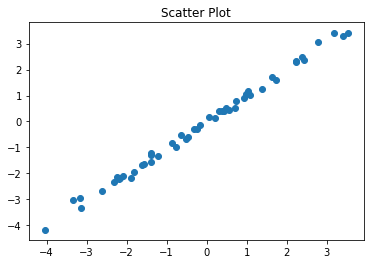

In [20]:
df = pd.read_csv('data3.csv', header = None);
X1 = df[0];
X2 = df[1];

cov_matrix = np.cov(np.matrix([X1, X2]), bias = False);

print("Covariance Matrix: ");
print(cov_matrix);

plt.scatter(X1, X2)
plt.title("Scatter Plot")
plt.show()

**(3c) Uncorrelate the covariance matrix $C$ using an orthonormal transformation (rotation).**

In [21]:
eigvalue = np.linalg.eig(cov_matrix)[0]
eigvectors = np.linalg.eig(cov_matrix)[1]

Q = np.matrix(eigvectors)

uncorrelated_matrix = (Q.transpose())*cov_matrix*(Q)

print("Uncorrelated Covariance Matrix: ")
print(uncorrelated_matrix)

print("Orthogonal Transformation: ")
print(Q)

Uncorrelated Covariance Matrix: 
[[8.40732783e-03 3.25027402e-16]
 [1.69496759e-16 7.24381702e+00]]
Orthogonal Transformation: 
[[-0.710222   -0.70397777]
 [ 0.70397777 -0.710222  ]]


**(3d) Apply the transformation to the data points. Now, visualize the data points.**

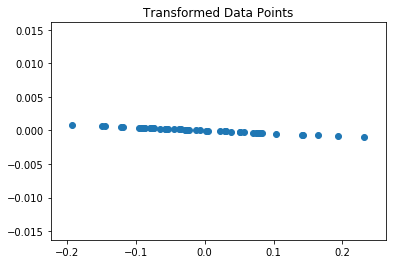

In [22]:
X = np.array([X1, X2])

mean = np.mean(X.T, axis = 1)

X = X - mean

P_2 = eigvectors.T.dot(X)

plt.scatter(P_2[0,:],P_2[1,:]) 
plt.title("Transformed Data Points")
plt.show()

**(3e) Find a one-dimensional representation of the data such that the representation loss is minimum.**

**(3f) Reverse the (rotation) transformation on the approximated data and visualize the data.**

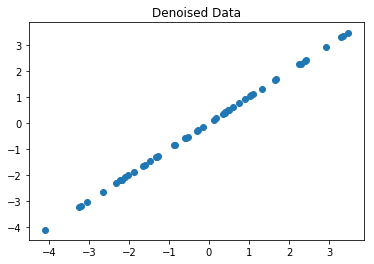

In [23]:
# One dimensional representation such that loss is minimum is by 
# projecting data points on the line in the direction of
# eigenvector corresppnding to maximum eigen value
pc1 = eigvectors[:,1]
X = np.array([X1, X2])
mean = np.mean(X.T, axis = 1)
X = X - mean
P = pc1.T.dot(X)

denoised = P.reshape(-1,1).dot(pc1.reshape(-1,1).T) + mean.reshape(-1,1)
plt.scatter(denoised[:,0],denoised[:,1])
plt.title("Denoised Data")
plt.show()

**(3e) Compute the representational loss (with respect to the original data).**

**(3f) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [24]:
pc1_loss = eigvalue[0]
pc2_loss = eigvalue[1]

print("PC1 loss : ", pc1_loss)
print("PC2 loss : ", pc2_loss)

x1_loss = (df[0]**2).sum()
x2_loss = (df[1]**2).sum()
print("X1 loss: ", x1_loss)
print("X2 loss: ", x2_loss)

PC1 loss :  0.008407327829842881
PC2 loss :  7.243817017013393
X1 loss:  177.66749559601547
X2 loss:  180.85513738058907


### Comments:
- We see that loss incured is equal to the eigen values ignored.
- Using PCA, we see that loss incured is actually 0.0084 which a lot lesser than just removing X1 or X2. Hence, transformation is really important to see if there actually exists a orthonormal basis so that we can convert a higher dimension data into lower dimesion data and try to decrease the curse of dimensionality.

**(4a) Load the data file 'data4.csv'.**

**(4b) Plot the representation loss as a function of the number of features (in the transformed domain) used for representation.**

Eigen Values:  [8.24709393e+01 9.63053418e-01 5.08138259e-03 2.17284178e-15]
Loss Incured:  [0.9681348003528185, 0.005081382587956162, 2.172841776123776e-15, 0]


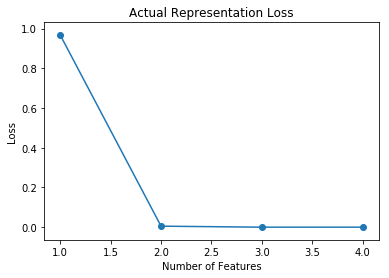

In [13]:
data4 = pd.read_csv('data4.csv', header = None)

X1 = data4[0]
X2 = data4[1]
X3 = data4[2]
X4 = data4[3]

cov_matrix = np.cov(np.matrix([X1, X2, X3, X4]), bias = False)

eigvalue = np.linalg.eig(cov_matrix)[0]
eigvectors = np.linalg.eig(cov_matrix)[1]

Q = np.matrix(eigvectors)

uncorrelated_matrix = (Q.transpose())*cov_matrix*(Q)

loss = [sum(eigvalue[1:]), sum(eigvalue[2:]), sum(eigvalue[3:]), 0]
number_features = [1, 2, 3, 4]

print("Eigen Values: ", eigvalue)
print("Loss Incured: ", loss)

plt.scatter(number_features, loss)
plt.plot(number_features, loss)
plt.xlabel("Number of Features")
plt.ylabel("Loss")
plt.title("Actual Representation Loss")
plt.show()

# Application

**(5a) Load the human face data set given below.**

In [14]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

** faces.data should contain vectorized 1-D images. faces.images should contain 2-D images.**

**(5b) Visualize the data set.**

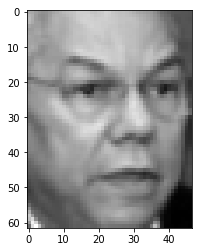

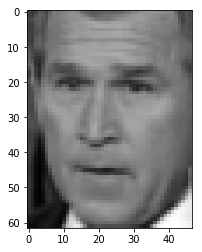

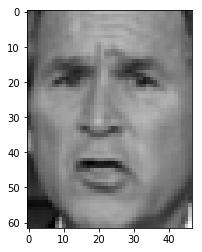

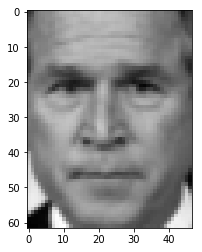

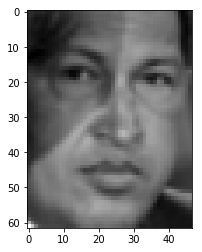

In [15]:
faces_data = pd.DataFrame(faces.data)
for i in range(5):
    plt.imshow(faces.images[i], cmap="gray")
    plt.show()

**(5c) Take faces.data and apply PCA. **

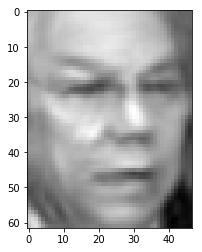

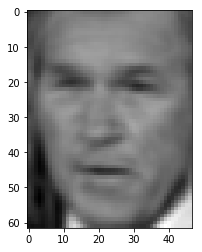

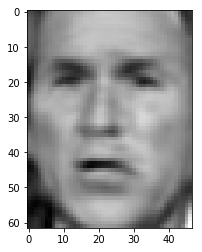

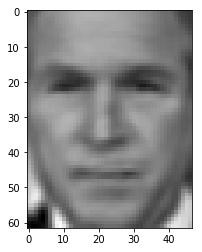

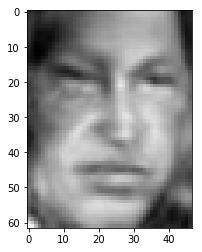

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150)
pca.fit(faces_data)

X_pca = pca.transform(faces_data)
X_projected = pca.inverse_transform(X_pca)

projected_images = X_projected.reshape(1348,62,47)

for i in range(5):
    plt.imshow(projected_images[i], cmap="gray")
    plt.show()

### Comments:

- As we see from above pictures which has 150 PCA features are denoised and data compression took place.
- PCA transform and then inverse transform helps us to remove unnecessary background and makes us to focus on the face.